In [1]:
import pandas as pd
import numpy as np 
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk import ngrams
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /home/anubhav08/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/anubhav08/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/anubhav08/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/anubhav08/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
df = pd.read_csv('Text Reviews.csv')
df.dtypes

title    object
dtype: object

In [3]:
print(df.shape)

(49, 1)


In [4]:
messages = " ".join([str(i) for i in df['title']])
words = word_tokenize(messages)

In [5]:
messages

'Smells so bad, people will quarantine you even without a lockdown Value for money and stays for long hours Cheap smell Didn\'t expected this from fog spray Cheap smell This product is very excellent  Cheap smell Very bad smell Fades away Nice fragrance but slightly high price Cheap smell The scent\'s initial impression is good. Just checked after receiving. Will better know after couple of days usage. But.. disappointed with the package as the cap was not sealed and the body had dents, as if like older or used product Cheap smell Nice fragrance. Cheap smell Though there was no Cap, Product is Good. Value for money. Cheap smell Good scent by fogg lasts pretty long Cheap smell It\'s not lasting more than 3hrs don\'t buy it if you want long lasting perfect Cheap smell Product super but small damaged Cheap smell Faded away Cheap smell Not long-lasting Faded away Product is very budget friendly but nothing you\'ll like to wear around, you might question "Whether this smell is good?" so won

In [6]:
def clean_words(new_tokens):
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
    return new_tokens

In [7]:
lowered = clean_words(words)

In [8]:
bow = Counter(lowered)
bow

Counter({'smell': 16,
         'bad': 2,
         'people': 2,
         'quarantine': 1,
         'even': 1,
         'without': 1,
         'lockdown': 1,
         'value': 2,
         'money': 2,
         'stay': 1,
         'long': 4,
         'hour': 2,
         'cheap': 11,
         'expected': 1,
         'fog': 1,
         'spray': 1,
         'product': 10,
         'excellent': 2,
         'fade': 1,
         'away': 12,
         'nice': 3,
         'fragrance': 3,
         'slightly': 1,
         'high': 1,
         'price': 2,
         'scent': 3,
         'initial': 1,
         'impression': 1,
         'good': 10,
         'checked': 1,
         'receiving': 1,
         'better': 1,
         'know': 1,
         'couple': 1,
         'day': 1,
         'usage': 1,
         'disappointed': 1,
         'package': 1,
         'cap': 3,
         'sealed': 2,
         'body': 1,
         'dent': 2,
         'like': 3,
         'older': 1,
         'used': 1,
         'though': 1

In [9]:
data = pd.DataFrame(bow.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)

In [10]:
data = data.head(10)

<AxesSubplot:xlabel='frequency', ylabel='word'>

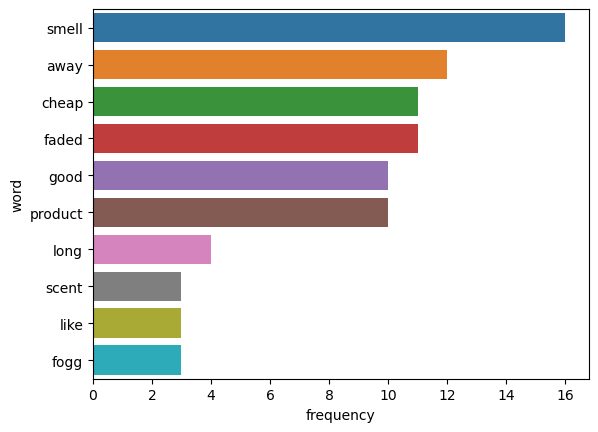

In [11]:
sns.barplot(x='frequency',y='word',data=data)